# Autoregressive Moving Average (ARMA): Sunspots data

In [1]:
%matplotlib inline

from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from statsmodels.graphics.api import qqplot

## Sunpots Data

In [3]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [4]:
dta = sm.datasets.sunspots.load_pandas().data

In [5]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

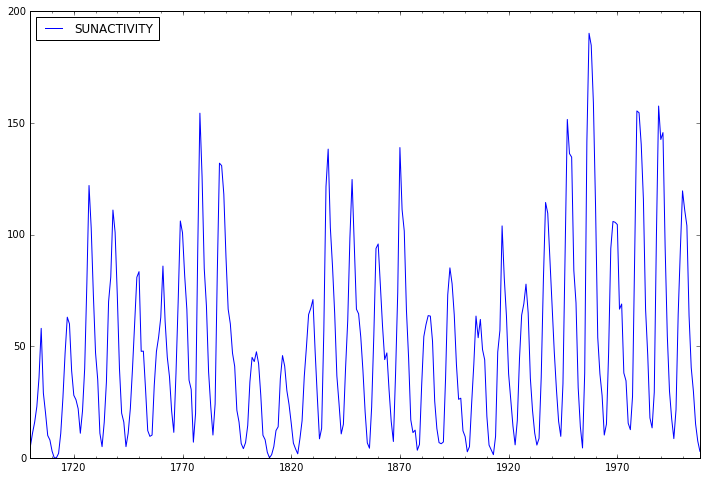

In [6]:
dta.plot(figsize=(12,8));

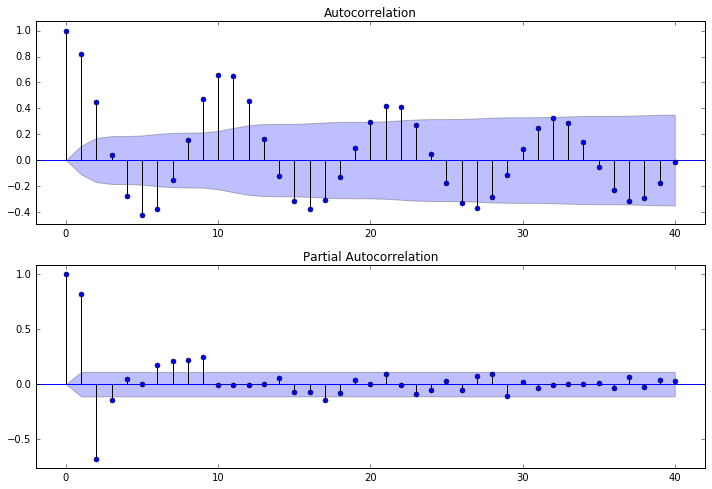

In [7]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

In [8]:
arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit()
print(arma_mod20.params)

const                49.659366
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64


In [9]:
arma_mod30 = sm.tsa.ARMA(dta, (3,0)).fit()

In [10]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

2622.63633806 2637.56970317 2628.60672591


In [11]:
print(arma_mod30.params)

const                49.749796
ar.L1.SUNACTIVITY     1.300810
ar.L2.SUNACTIVITY    -0.508093
ar.L3.SUNACTIVITY    -0.129650
dtype: float64


In [12]:
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

2619.4036287 2638.07033508 2626.86661351


* Does our model obey the theory?

In [13]:
sm.stats.durbin_watson(arma_mod30.resid.values)

1.9564806905406757

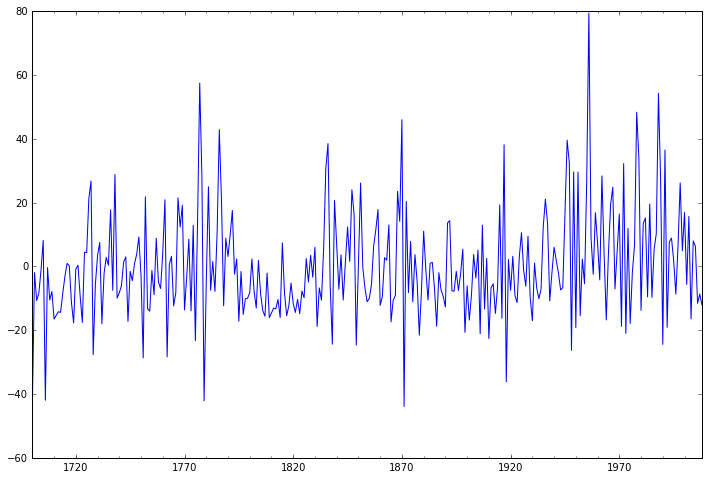

In [14]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);

In [15]:
resid = arma_mod30.resid

In [16]:
stats.normaltest(resid)

(49.845037117754678, 1.5006786874160721e-11)

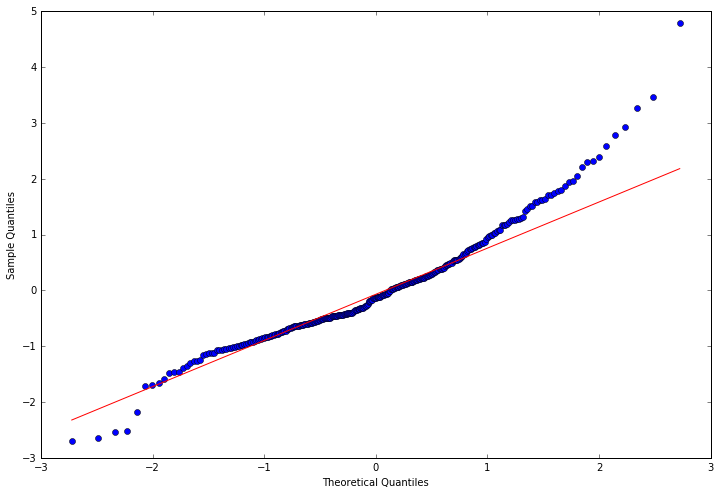

In [17]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

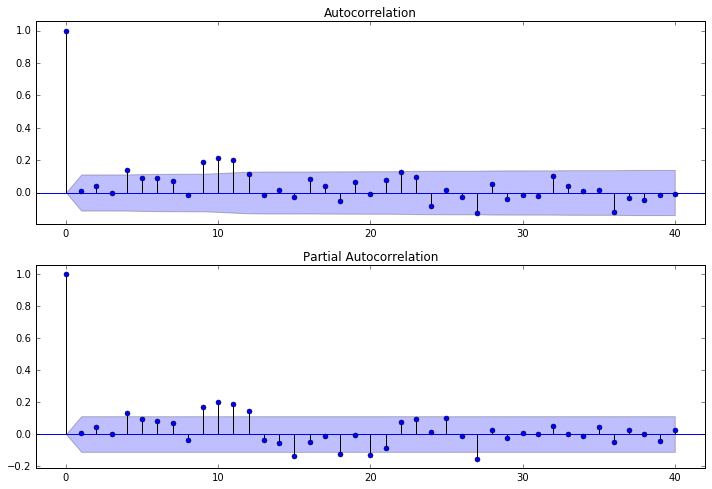

In [18]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [19]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

           AC          Q      Prob(>Q)
lag                                   
1    0.009179   0.026287  8.712008e-01
2    0.041793   0.573048  7.508690e-01
3   -0.001334   0.573607  9.024469e-01
4    0.136089   6.408955  1.706181e-01
5    0.092469   9.111881  1.046840e-01
6    0.091949  11.793308  6.674192e-02
7    0.068748  13.297273  6.518822e-02
8   -0.015020  13.369300  9.975911e-02
9    0.187592  24.641988  3.393810e-03
10   0.213718  39.322079  2.229398e-05
11   0.201082  52.361229  2.344860e-07
12   0.117182  56.804288  8.573905e-08
13  -0.014055  56.868423  1.893827e-07
14   0.015398  56.945664  3.997499e-07
15  -0.024967  57.149416  7.741175e-07
16   0.080916  59.296873  6.871888e-07
17   0.041138  59.853844  1.110899e-06
18  -0.052021  60.747533  1.548371e-06
19   0.062496  62.041796  1.831572e-06
20  -0.010301  62.077084  3.381114e-06
21   0.074453  63.926758  3.193467e-06
22   0.124955  69.154873  8.978021e-07
23   0.093162  72.071136  5.799571e-07
24  -0.082152  74.346787 

* This indicates a lack of fit.

* In-sample dynamic prediction. How good does our model do?

In [20]:
predict_sunspots = arma_mod30.predict('1990', '2012', dynamic=True)
print(predict_sunspots)

1990-12-31    167.047353
1991-12-31    140.992848
1992-12-31     94.858876
1993-12-31     46.860614
1994-12-31     11.242300
1995-12-31     -4.721532
1996-12-31     -1.167078
1997-12-31     16.185598
1998-12-31     39.021839
1999-12-31     59.449843
2000-12-31     72.170093
2001-12-31     75.376689
2002-12-31     70.436311
2003-12-31     60.731396
2004-12-31     50.201584
2005-12-31     42.075817
2006-12-31     38.114099
2007-12-31     38.454487
2008-12-31     41.963690
2009-12-31     46.869181
2010-12-31     51.423160
2011-12-31     54.399610
2012-12-31     55.321566
Freq: A-DEC, dtype: float64


/usr/local/lib/python2.7/dist-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


/usr/local/lib/python2.7/dist-packages/statsmodels/tsa/arima_model.py:1724: FutureWarning: TimeSeries is deprecated. Please use Series
  forecast = TimeSeries(forecast, index=self.data.predict_dates)


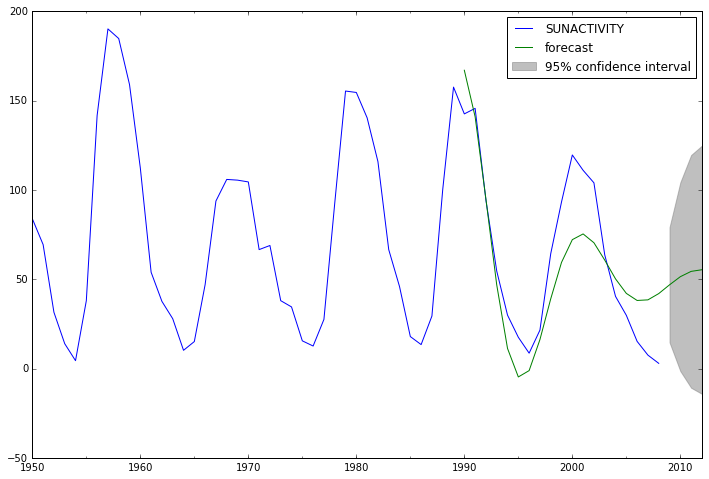

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.ix['1950':].plot(ax=ax)
fig = arma_mod30.plot_predict('1990', '2012', dynamic=True, ax=ax, plot_insample=False)

In [22]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

In [23]:
mean_forecast_err(dta.SUNACTIVITY, predict_sunspots)

5.6371143703450644

### Exercise: Can you obtain a better fit for the Sunspots model? (Hint: sm.tsa.AR has a method select_order)

### Simulated ARMA(4,1): Model Identification is Difficult

In [24]:
from statsmodels.tsa.arima_process import arma_generate_sample, ArmaProcess

In [25]:
np.random.seed(1234)
# include zero-th lag
arparams = np.array([1, .75, -.65, -.55, .9])
maparams = np.array([1, .65])

Let's make sure this model is estimable.

In [26]:
arma_t = ArmaProcess(arparams, maparams)

In [27]:
arma_t.isinvertible

True

In [28]:
arma_t.isstationary

False

* What does this mean?

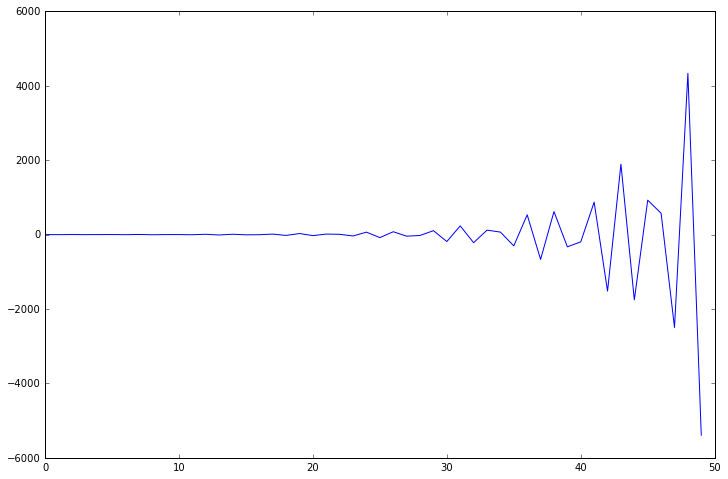

In [29]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(arma_t.generate_sample(nsample=50));

In [30]:
arparams = np.array([1, .35, -.15, .55, .1])
maparams = np.array([1, .65])
arma_t = ArmaProcess(arparams, maparams)
arma_t.isstationary

True

In [31]:
arma_rvs = arma_t.generate_sample(nsample=500, burnin=250, scale=2.5)

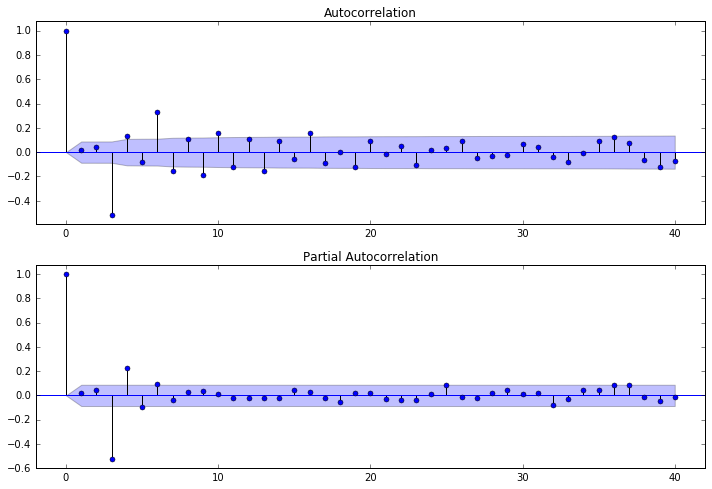

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arma_rvs, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_rvs, lags=40, ax=ax2)

* For mixed ARMA processes the Autocorrelation function is a mixture of exponentials and damped sine waves after (q-p) lags. 
* The partial autocorrelation function is a mixture of exponentials and dampened sine waves after (p-q) lags.

In [33]:
arma11 = sm.tsa.ARMA(arma_rvs, (1,1)).fit()
resid = arma11.resid
r,q,p = sm.tsa.acf(resid, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

           AC           Q      Prob(>Q)
lag                                    
1    0.254921   32.687678  1.082211e-08
2   -0.172416   47.670747  4.450704e-11
3   -0.420945  137.159393  1.548466e-29
4   -0.046875  138.271302  6.617701e-29
5    0.103240  143.675909  2.958720e-29
6    0.214864  167.132999  1.823718e-33
7   -0.000889  167.133401  1.009206e-32
8   -0.045418  168.185753  3.094835e-32
9   -0.061445  170.115803  5.837214e-32
10   0.034623  170.729855  1.958737e-31
11   0.006351  170.750557  8.267052e-31
12  -0.012882  170.835910  3.220232e-30
13  -0.053959  172.336548  6.181195e-30
14  -0.016606  172.478965  2.160214e-29
15   0.051742  173.864488  4.089545e-29
16   0.078917  177.094281  3.217935e-29
17  -0.001834  177.096029  1.093167e-28
18  -0.101604  182.471938  3.103822e-29
19  -0.057342  184.187772  4.624065e-29
20   0.026975  184.568286  1.235670e-28
21   0.062359  186.605963  1.530258e-28
22  -0.009400  186.652365  4.548193e-28
23  -0.068037  189.088185  4.562009e-28


In [34]:
arma41 = sm.tsa.ARMA(arma_rvs, (4,1)).fit()
resid = arma41.resid
r,q,p = sm.tsa.acf(resid, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

           AC          Q  Prob(>Q)
lag                               
1   -0.007889   0.031303  0.859567
2    0.004132   0.039907  0.980244
3    0.018103   0.205418  0.976710
4   -0.006760   0.228543  0.993948
5    0.018120   0.395028  0.995465
6    0.050688   1.700453  0.945086
7    0.010252   1.753961  0.972196
8   -0.011206   1.818023  0.986091
9    0.020292   2.028522  0.991008
10   0.001029   2.029064  0.996113
11  -0.014035   2.130173  0.997984
12  -0.023858   2.422929  0.998427
13  -0.002108   2.425219  0.999339
14  -0.018783   2.607431  0.999590
15   0.011316   2.673700  0.999805
16   0.042159   3.595422  0.999443
17   0.007943   3.628208  0.999734
18  -0.074311   6.503855  0.993686
19  -0.023379   6.789067  0.995256
20   0.002398   6.792073  0.997313
21   0.000487   6.792198  0.998516
22   0.017953   6.961435  0.999024
23  -0.038576   7.744466  0.998744
24  -0.029816   8.213249  0.998859
25   0.077850  11.415821  0.990675
26   0.040408  12.280445  0.989479
27  -0.018612  12.46

### Exercise: How good of in-sample prediction can you do for another series, say, CPI

In [35]:
macrodta = sm.datasets.macrodata.load_pandas().data
macrodta.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
cpi = macrodta["cpi"]

#### Hint: 

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = cpi.plot(ax=ax);
ax.legend();

P-value of the unit-root test, resoundly rejects the null of no unit-root.

In [ ]:
print(sm.tsa.adfuller(cpi)[1])